In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0,3,130)
y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

y.shape

(130,)

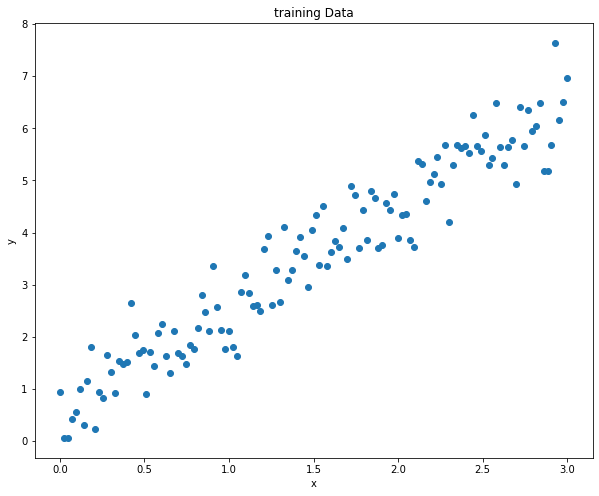

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')

plt.title('training Data')
plt.show()

In [5]:


class LinearModel :

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "w")
        self.bias = tf.Variable(np.random.randn(), name ='b')

    def __call__(self,X):
        return self.weight * x + self.bias

   

In [6]:
def loss (y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))
    

In [7]:
def train(linear_model, x, y, lr=0.1):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y,y_pred)

    b_weight, b_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])

    linear_model.weight.assign_sub(lr * b_weight)
    linear_model.bias.assign_sub(lr * b_bias)


In [8]:
linear_model = LinearModel()

weights, biases = [],[]

epochs = 10

lr = 0.15

2021-10-02 06:22:11.045604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 06:22:11.050452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 06:22:11.050723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 06:22:11.051259: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
for epochs_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y,linear_model(x))

    train(linear_model, x, y , lr= lr)

    print(f"Epcho count {epochs_count} : Loss value: {real_loss.numpy()}")



Epcho count 0 : Loss value: 32.986732482910156
Epcho count 1 : Loss value: 1.029334545135498
Epcho count 2 : Loss value: 0.35893678665161133
Epcho count 3 : Loss value: 0.3346085846424103
Epcho count 4 : Loss value: 0.3248157203197479
Epcho count 5 : Loss value: 0.3164028823375702
Epcho count 6 : Loss value: 0.3089733123779297
Epcho count 7 : Loss value: 0.3024078607559204
Epcho count 8 : Loss value: 0.2966059446334839
Epcho count 9 : Loss value: 0.29147869348526


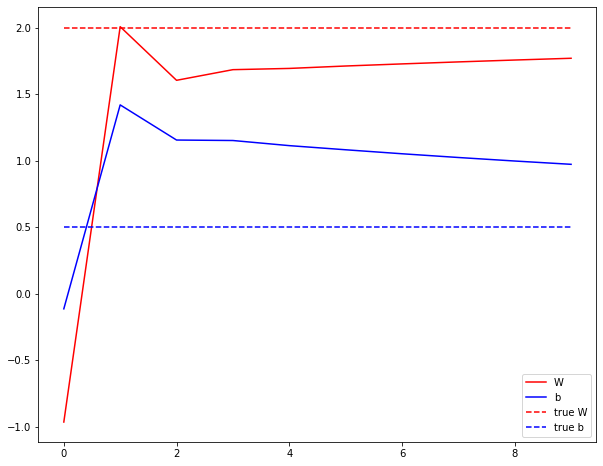

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W','b', 'true W', 'true b'])
plt.show()

In [11]:
linear_model.weight.numpy(),linear_model.bias.numpy()

(1.7817984, 0.94850695)

In [12]:
rmse = loss(y, linear_model(x))
rmse.numpy()

0.2869477

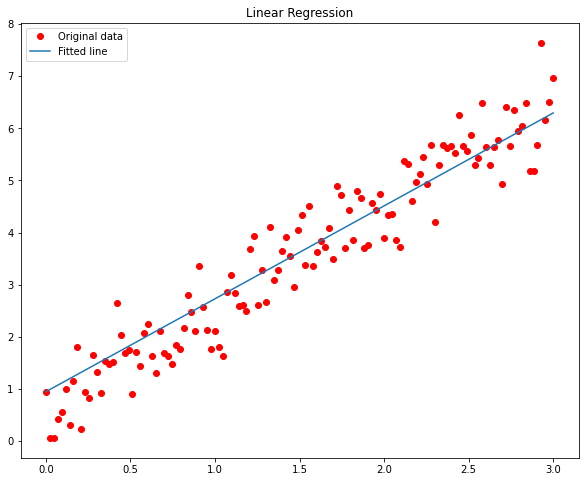

In [13]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro', label = 'Original data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.title('Linear Regression')

plt.legend()
plt.show()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
x.shape,y.shape

((130,), (130,))

In [16]:
x = pd.DataFrame(x,columns=['x'])
y = pd.DataFrame(y,columns=['y'])

In [17]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [18]:
y.head()

,y
0,0.948537
1,0.068655
2,0.059417
3,0.428417
4,0.549943


In [19]:
x.shape,y.shape

((130, 1), (130, 1))

In [20]:
model = keras.Sequential([layers.Dense(1,input_shape =(1,), activation = 'linear')])
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(loss ='mse', metrics=['mse'], optimizer=optimizer)


In [21]:
model.fit(x,y,epochs=10)

2021-10-02 06:22:12.006797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-02 06:22:12.472195: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2021-10-02 06:22:12.472236: W tensorflow/stream_executor/stream.cc:1298] attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError:  Blas xGEMV launch failed : a.shape=[1,32,1], b.shape=[1,1,1], m=32, n=1, k=1
	 [[node sequential/dense/MatMul (defined at tmp/ipykernel_12716/1958316956.py:1) ]] [Op:__inference_train_function_995]

Function call stack:
train_function


In [ ]:
for layer in model.layers:
  print(layer.name, layer)

print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

dense <tensorflow.python.keras.layers.core.Dense object at 0x0000027405F18D30>
[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.0164137]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.38027522], dtype=float32)>]
[0.38027522]


In [ ]:
y_pred = model.predict(x)

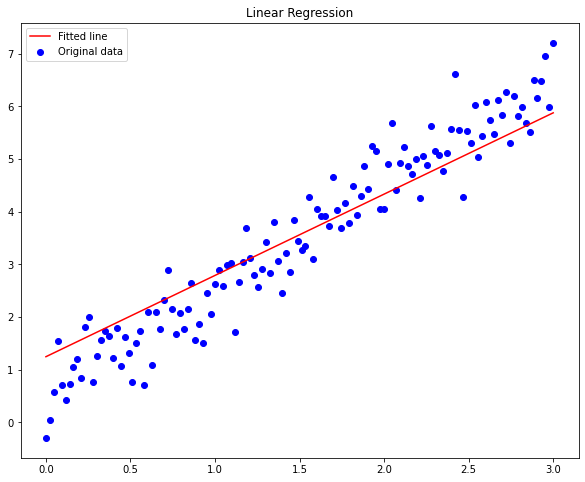

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,c='blue', label = 'Original data')
plt.plot(x,y_pred,color='r',label='Fitted line')
plt.title('Linear Regression')
plt.legend()
plt.show()